http://detexify.kirelabs.org/classify.html

# Логистическая регрессия. Нейронные сети

Добро пожаловать в первую лабораторную работу по нейронным сетям.

Методы машинного обучения и искусственного интеллекта обычно предназначены для решения 2х основных задач: классификации и регрессии.

Задача **классификации** заключается в определение принадлежности объекта к одному из заранее определенных классов. Простейший пример такой задачи - классификация изображений цифр: нужно определить, изображение какой цифры (от 0 до 9) представлена модели в текущий момент. В случае классификации классы являются дискретными.

Задача **регрессии** - попытка восстановить недостающие значения временного ряда или спрогнозировать его. Примером такой задачи может быть прогноз погоды. прогнозируемые данные в этом случае, как правило, вещественные и непрерывные.

В этой лабораторной работе мы будем решать задачу бинарной (когда у нас есть только 2 возможных класса) **классификации**. Работа знакомит с моделью логистической регрессии - это алгоритм классификации, а не регрессии, как можно подумать из названия! Данный алгоритм был разработан задолго до появления компьютеров, однако, до сих пор остается востребованным благодаря своей простоте и уникальности.

**Указания к выполнению:**
- Не используйте циклы (for/while) в коде, если в задании не сказано об обратном.

**Задачи лабораторной №2:**
- Создать основные методы для обучающения нейронной сети:
    - Инициализация параметров
    - Вычисление функции ошибки модели и ее градиента
    - Использование оптимизационного алгоритма (градиентный спуск)
- Обучить нейронную сеть

Логистическая регрессия относится к статистическим моделям, так как она не только определяет класс объекта, но еще и расчитвает вероянтость принадлежности объекта данному классу (предсказывает вероятность возникновения события). Эта модель часто применяется в задачах классификации на основе линейных моделей. Она применима как для бинарной классификации (когда у нас всего 2 разных класса), так и для многоклассовой (больше 2х классов) – в форме мультиномиальной логистической регрессии.

Таким образом, бинарная логистическая модель применяется для оценивания вероятности принадлежности объекта к одному из двух классов по переданным на вход признакам данного объекта.

Создайте файл с именем **utils.py** в корне папки с программой. Вставьте представленный ниже код:

In [27]:
import numpy as np
import h5py


def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# 1. Подключение библиотек

В начале работы необходимо импортировать все необходимые библиотеки для выполнения задания:
- numpy - это библиотека для научных расчетов, мы знакомились с ней в прошлой лабораторной работе
- h5py - библиотека для работы с данными в форматах: .hdf, .h4, .hdf4, .he2, .h5, .hdf5 или .he5
- matplotlib - библиотека для визуализации данных
- PIL - это библиотека для работы с растровыми изображениями
- scipy - библиотека, предназначенная для выполнения научных и инженерных расчётов

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from utils import load_dataset

%matplotlib inline

# 2. Анализ входных данных

Входной набор данных представляет собой изображения, размеченные на два класса - "кошки" (y=1) и "не кошки" (y=0), и разделяется на:
* обучающая выборка - `m_train`,
* тестовая выбборка - `m_test`.
Каждое изображение размером `(num_py, num_px)` имеет 3 канала RGB.

**Обратите внимание**, что каждому примеру из обучающей и тестовой выборки соответсвует **целевое значение** $y \in \{0,1\}$. Именно таких выходов мы будем требовать при обучении модели.

**Задание:** построить с помощью алгоритма логистической регрессии бинарный классификатор для классификации описанного выше набора изображений.

Запустите код ниже, чтобы загрузить датасет с помощью вспомогательных функций, описанных в библиотеке `utils.py`

In [29]:
# Загрузка наборов данных
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

В датасетах train_set_x_orig и test_set_x_orig каждая строка представляет собой изображение.

1. Визуализируйте некоторые примеры, меняя значение index и выполняя код.
2. Выведите на экран форму(shape) тензоров, поясните полученные значения.

y = [0], это класс 'non-cat' изображений.


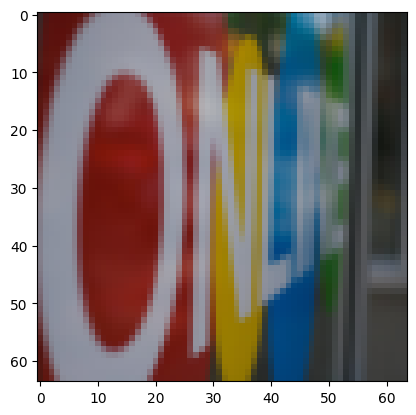

In [30]:
# Пример изображения
index = 49
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", это класс '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' изображений.")

y = [0], это класс 'non-cat' изображений.


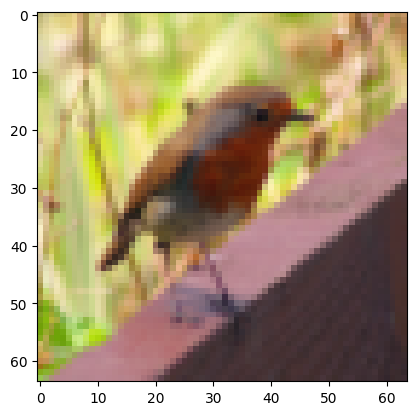

In [31]:
index = 10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", это класс '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' изображений.")

Найдите значения следующих парамеров датасета:
* `m_train` - число обучающих примеров
* `m_test` - число тестовых примеров
* `num_px` - ширина изображения
* `num_py` - высота изображения

`train_set_x_orig` является numpy-тензором размером `(m_train, num_py, num_px, 3)`.

In [32]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_py = train_set_x_orig.shape[1]
num_px = train_set_x_orig.shape[2]

print ("Количество обучающих примеров: m_train = " + str(m_train))
print ("Количество тестовых примеров: m_test = " + str(m_test))
print ("Ширина изображения: num_px = " + str(num_px))
print ("Высота изображения: num_py = " + str(num_py))
print ("Форма массива изображения: (" + str(num_py) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Количество обучающих примеров: m_train = 209
Количество тестовых примеров: m_test = 50
Ширина изображения: num_px = 64
Высота изображения: num_py = 64
Форма массива изображения: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


Сначала измените форму тензора изображения (num_py, num_px, 3) на numpy-тензор формой (num_py $*$ num_px $*$ 3, 1), где каждый столбец будет соотвествовать изображению.

Преобразование вектора X размером (a,b,c,d) в матрицу X_flatten размером (b$*$c$*$d, a) можно осуществить следующим образом:
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [33]:
# Измените форму тренировочного и тестового набора

train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [34]:
# Проверка правильности измнения формы массивов
assert np.array_equal(train_set_x_flatten[0:5,0],np.array([17, 31, 56, 22, 33]))

Для представления изображений в цветовой системе RGB значение каждого пикселя представляет собой вектор из трёх чисел в диапазоне от 0 до 255.

Было бы проблематично передать в нейронную сеть значения, имеющие самые разные диапазоны. Сеть, конечно, сможет автоматически адаптироваться к таким разнородным данным, однако это усложнит обучение.

На практике одним из распространенных шагов предварительной обработки в машинном обучении является нормализация: для каждого признака во входных данных(столбца в матрице входных данных) из каждого значения вычитается среднее по этому признаку, и разность делится на стандартное отклонение, в результате признак центрируется по нулевому значению и имеет стандартное отклонение, равное единице. Такую нормализацию легко выполнить с помощью Numpy.

Для нашего набора изображений просто разделим каждую строку набора данных на 255 (максимальное значение пиксельного канала).

In [35]:
train_set_x = (train_set_x_flatten/255).astype(np.float32)
test_set_x = (test_set_x_flatten/255).astype(np.float32)

In [36]:
train_set_x.shape

(12288, 209)

In [37]:
test_set_x.shape

(12288, 50)

In [38]:
test_set_y.T

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

**задание** - опишите следующие тензоры и диапазоны содержащихся в них значений:

- train_set_x: 209 фотографий тренировочного датасета, интенсивности пикселей находятся в каждой строке для отдельного изображения (каждый пиксель кодируется тремя числами [0,1]) (хотя это зависит от самой фотографии)
- test_set_x: аналогично train_set_x, но содержит тестовые данные
- train_set_y: вектор-строка (?) с метками {0,1}
- test_set_y: аналогично train_set_y

<font color='blue'>
**Промежуточные итоги:**

Распространенными шагами предварительной обработки данных являются:
1. Определение числа и исходных размеров входных данных (m_train, m_test, num_px, ...)
2. Измение формы набора данных таким образом, чтобы каждый пример представлял собой вектор-столбец
3. Нормализация данных

## 3 - Модель нейронной сети ##

Многослойный персептрон (MLP) - несколько нейроннов, связанных между собой - называют нейронными сетями прямого распространения или просто нейронными сетями. MLP можно рассматривать как обобщение линейных моделей, которое прежде чем прийти к решению выполняет несколько этапов обработки данных.

На самом деле **логистическую регрессию** можно представить одним нейроном, это видно из рисунка ниже:

<img src="https://drive.google.com/uc?id=1K0yi6aYhxJZ4vy0sRnux1mJ_8MSl1lBN" width=70%>

**Математическая формулировка**:

Сформулируем работу модели лля одного объекта из обучающей выборки $x^{(i)}$:

$$z^{(i)} = w^T x^{(i)} + b \tag{1},$$

где $x^{(i)}$ - вектор признаков текущего объекта,
$w^T$ - вектор весов признаков,
$b$ - свободный коэффициент (bias),
$z^{(i)}$ - результат линейной комбинации признаков текущего объекта с соответсвующими весами.


В результате на выходе модели получим:

$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2},$$

где $\hat{y}^{(i)} = a^{(i)}$ - выходное значение модели в ответ на входной объект $x^{(i)}$.



**Оценка качества построенной модели**:

Как мы уже обсуждали, настройка модели заключается в подборе вектора весов $w$. Для того, чтобы как-то корректировать веса, нам нужно оценить качество модели на обучающих примерах. Для этого формулируется функция оценки качества модели $\mathcal{L1}$.

$$\mathcal{L1}(a^{(i)}, y^{(i)}) =  y^{(i)}  \log(a^{(i)}) + (1-y^{(i)} )  \log(1-a^{(i)})\tag{3},$$

где $y^{(i)}$ - целевое значение (или желаемый выход сети),
$a^{(i)}$ - выходное значение модели.


Давайте разберем, действительно ли оценка возрастает, если модель угадывает класс объекта правильно.

Рассмотрим 4 примера:
1. $y^{(i)} = 1, a^{(i)} = 0.01$ - в этом случае модель сильно ошиблась, она выдала значение близкое к 0;
2. $y^{(i)} = 1, a^{(i)} = 0.8$ - в этом случае модель сработала правильно, угадав класс 1;
3. $y^{(i)} = 0, a^{(i)} = 0.8$ - в этом случае модель сильно ошиблась, она выдала значения близкие к 1;
4. $y^{(i)} = 0, a^{(i)} = 0.1$ - в этом случае модель сработала правильно, угадав класс 0.

Теперь рассчитаем функцию качества для наших примеров:
1. $\mathcal{L1}(a^{(i)}, y^{(i)}) = 1*log(0.01) +0*log(0.99) = -4.6$
2. $\mathcal{L1}(a^{(i)}, y^{(i)}) = 1*log(0.8)+0*log(0.2) = -0.22$
3. $\mathcal{L1}(a^{(i)}, y^{(i)}) = 0*log(0.8)+1*log(0.2) = -1.6$
4. $\mathcal{L1}(a^{(i)}, y^{(i)}) = 0*log(0.9)+1*log(0.1) = -0.1$

Таким образом, чем ближе выход модели к истинному значению, тем больше значение функции качества на этом примере.

В этой работе мы собирается минимизировать функцию **потерь** или ошибок модели $\mathcal{L}$ на объекте $x^{(i)}$, поэтому добавим минус к только что заданной функции оценки качества:

$$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3} \longrightarrow min,$$

На самом деле в качестве функции ошибки можно применять различные функции, например считать среднеквадратичную ошибку (MSE). Применение функции ошибки такого вида определяет название метода - **логистическая регрессия**. На выходе она дает оценку вероятнсти того, что объект принадлежит классу 1.

Полная функция ошибки модели на всей обучающей выборке рассчитывается путем суммирования всех значений функции ошибки на каждом примере обучения:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

При обучении сети нам необходимо минимизировать функцию ошибки, т.е. найти ее минимум. это можно сделать рассчитав градиент функции ошибки.

**Задачи**:
В этом задании необходимо выполнить следующие шаги:
- инициализировать параметры модели;
- обучить модель, минимизировав функцию потерь;
- использовать обученную модель для прогнозирования (на тестовом наборе);
- проанализировать результаты и сделать вывод.

## 4 - Построение модели ##

Основными шагами для для построения нейронной сети являются:
1. Определение архитектуры сети (количество входных признаков, количество слоев нейронов)
2. Инициализация параметров сети (задание начальных значений весов w)
3. Обучение в виде цикла:
    - Рассчет ошибки на одной итерации (прямое распространение)
    - Расчет градиента ошибки (обатное распространение ошибки)
    - Обновление параметров сети (градиентный спуск)

Вам необходимо реализовать пункты 1-3 отдельными функциями и затем соединить их в функции `model()`.

### 4.1 - Сигмоидальная функция активации

**Задание**: Реализуйте сигмоидальную функцию `sigmoid()`, вычисляющую $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$. Используйте np.exp().

In [39]:
# Функция активации: sigmoid

def sigmoid(z):
    s = 1 / (1+ np.exp(-z))

    return s

In [40]:
assert sigmoid(np.array([0,2]))[0] == 0.5
assert round(sigmoid(np.array([0,2]))[1], 6) == 0.880797

### 4.2 - Инициализация параметров
**Задание:** Реализуйте инициализацию весовых коэффициентов нулями, используя np.zeros().

In [41]:
# Инициализация нулями: initialize_with_zeros

def initialize_with_zeros(dim):
    w = np.zeros((dim, 1), dtype=np.float32)
    b = np.zeros_like(dim, dtype= np.float32)

    return w, b

In [42]:
dim = 2
w, b = initialize_with_zeros(dim)


In [43]:
w, b

(array([[0.],
        [0.]], dtype=float32),
 array(0., dtype=float32))

In [44]:
assert np.array_equal(w,np.array([[0.],[0.]]))
assert np.array_equal(b,0)

### 4.3 - Прямое и обратное распространение ошибки

Наиболее известный алгоритм обучения нейронной сети - метод обратного распространения ошибки.
Данный алгоритм используется для минимизации отклонения реальных значений на выходе нейронной сети от целевых.

Для того, чтобы найти минимум функции, нужно приравнять ее производную к нулю. Следовательно, нам нужно рассчитать градиент функции потерь.

**Задание:** Реализуйте функцию `propagate()`, которая вычисляет функцию потерь и ее градиент.

**Подсказки**:

Прямое распространение сигнала:
- Предъявление очередного экземпляра Х из обучающей выборки на вход нейронной сети;


- Вычисление выходного сигнала модели $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$;


- Определение ошибки модели: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$.

Расчет градиента функции потерь по значениям весов $w$  и смещения $b$ осуществляется по следующим формулам:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7},$$

где $m$ - количество объектов в обучающей выборке;
$X$ - матрица признаков объектов (которая подается на вход сети);
$A$ - вектор выходных значений модели для всех объектов обучающей выборки;
$Y$ - вектор целевых значений для всех объектов обучающей выборки.

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8},$$

где $m$ - количество объектов в обучающей выборке;
$a^{(i)}$ - выходное значение модели для объекта с индексом $i$ обучающей выборки;
$y^{(i)}$ - целевое значение для объекта с индексом $i$ обучающей выборки.

In [45]:
# Прямое и обратное распространение ошибки: propagate

def propagate(w, b, X, Y):
    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    # YOUR CODE HERE
    z = np.dot(w.T,X) + b
    linear_layer = sigmoid(z)
    cost = (-1/m) * np.sum(Y*np.log(linear_layer) + (1-Y)*np.log(1-linear_layer))


    # BACKWARD PROPAGATION (TO FIND GRAD)
    # YOUR CODE HERE
    
    a = linear_layer-Y
    dw = (1/m) * np.dot(X,a.T)
    db = np.mean(linear_layer - Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [46]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)

assert np.round(grads["dw"])[0] == 1
assert np.round(grads["dw"])[1] == 2
assert np.round(grads["db"],1) == 0.5
assert np.round(cost) == 6

### 4.4 - Корректировка весов
Значение производной в точке характеризует скорость изменения фукции в этой точке, а точнее скорость её возрастания. Так как нам нужно минимизировать функцию ошибок, то двигаться нужно в обратном направлении - направлении убывания функции или антиградиента.

**Задание:** Напишите ниже функцию обучения, которая корректирует веса $w$ и смещения $b$ при минимизации функции потерь выхода $J$. Для параметра $w$ реализуйте правило обновления $ w = w - \alpha \text{ } \frac{\partial J}{\partial w}$, где $\alpha$ - скорость обучения.

In [47]:
# Функция оптимизации: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []

    for i in range(num_iterations):


        # Вычисление градиента и функции стоимости
        # YOUR CODE HERE

        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]


        # обновление весов
        # YOUR CODE HERE
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [48]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

pw = params["w"]
pb = params["b"]
assert np.round(pw,5)[0] == 0.11246
assert np.round(pw,5)[1] == 0.23107
assert np.round(pb,5) == 1.55930

assert np.round(grads["dw"],5)[0] == 0.90158
assert np.round(grads["dw"],5)[1] == 1.76251
assert np.round(grads["db"],5) == 0.43046

**Задание:** Предыдущая функция обучения позволяет подобрать параметры весов w и смещений b нейронов сети. Используйте обученные параметры для предсказания класса экземпляра входных данных X. Реализуйте функцию `predict()`, состоящую из следующих шагов:

1. Вычисление $\hat{Y} = A = \sigma(w^T X + b)$

2. Присвоение метки класса для значения a: если значение функции активации <= 0.5, то 0, иначе 1 (активация > 0.5). запись результата классификации в вектор `Y_prediction`.

In [49]:
# Функция классификации: predict

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Вычислите вектор "A"
    # YOUR CODE HERE
    A = sigmoid(np.dot(w.T, X)+ b)

    for i in range(A.shape[1]):

        # Произведите классификацию с помощью порогового значения 0.5
        # YOUR CODE HERE
        Y_prediction = (A>0.5).astype(float)

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [50]:
assert np.array_equal(predict(w, b, X),np.array([[1.,1.]]))

<font color='blue'>
**Промежуточные итоги:**

Основными шагами для классификации нейронной сетью являются:
* Инициализация начальных значений параметров сети (w,b)
* Итерационная оптимизация функции ошибки путем обучения параметров (w,b):
  *   вычисление функции стоимости и ее градиента
  *   обновление значений параметров используя метод градиентного спуска
* Классификация набора данных с использованием обученных (w,b)

## 5 - Создание классификатора ##

После того, как реализованы все базовые функции, создадим классификатор на основе неронной сети.

**Задание:** Реализуйте функцию `model()`:
- Y_prediction_test используйте для тестирования модели на тестовом наборе
- Y_prediction_train используйте для тестирования модели на тренировочном наборе
- w, costs, grads - результат фнкции optimize()

In [51]:
# Модель классификатора: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    # инициализация параметов (w, b)
    # YOUR CODE HERE
    w, b =  initialize_with_zeros(X_train.shape[0])

    # Градиентный спуск
    # YOUR CODE HERE
    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iterations=num_iterations,learning_rate=learning_rate,print_cost=print_cost)

    w = parameters["w"]
    b = parameters["b"]

    # Предсказание Y_prediction_test, Y_prediction_train
    # YOUR CODE HERE
    Y_prediction_train = predict(w,b,X_train)
    Y_prediction_test = predict(w,b,X_test)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [58]:
# Обучим полученную модель
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Примерные результаты**:

<table style="width:40%">

    <tr>
        <td> **Ошибка после 0 итерации **  </td>
        <td> 0.693147 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td>
        <td> <center> $\vdots$ </center> </td>
    </tr>  
    <tr>
        <td> **Точность на обучающей выборке**  </td>
        <td> 99.04306220095694 % </td>
    </tr>

    <tr>
        <td>**Точность на тестовой выборке** </td>
        <td> 70.0 % </td>
    </tr>
</table>


**Комментарий**: точность обучения модели на тренировочном модели стремиться к 100%, что означает, что модель работает и имеет достаточно хорошее соответствие данным обучения. Точность реализованного классификатора на тестовом наборе приблизительно составляет 68%, что неплохо для такой линейной модели, как логистическая регрессия, а также обученной на маленьком наборе данных. В последующих лабоаторных работах Вам предстоить усложнить нейронную сеть и создать более точный классификатор!

Позже Вы узнаете, как бороться с переобучением, например, с помощью регуляризации, а пока можете проверить результаты обучения модели, используя приведенный ниже код (и изменяя переменную `index`). Посмотрите результаты классификации на изображениях тестового набора.

y = 1, предсказание нейросети: "non-cat" на изображении.


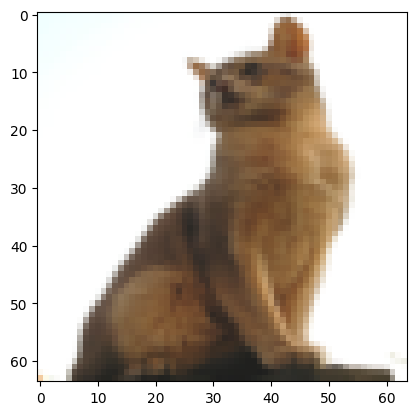

In [59]:
index = 6
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", предсказание нейросети: \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" на изображении.")

Построим график обучения сети: график зависимости функции стоимости от времени обучения

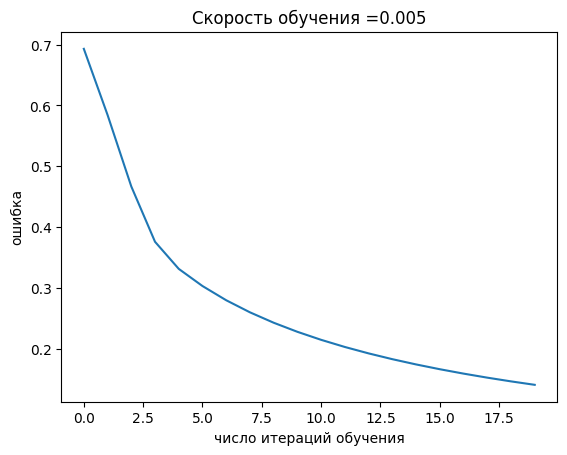

In [60]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('ошибка')
plt.xlabel('число итераций обучения')
plt.title("Скорость обучения =" + str(d["learning_rate"]))
plt.show()

Пояснение: график потерь в результате обучения стремиться к 0, что говорит о том, что модель обучается и все больше соотвествует данным. Однако с увеличением количества эпох обучения модель начинает подстраиваться под обучающие данные, "запоминать" тренировочный набор, однако это приводит зачастую к тому, что точность на тестовом наборе уменьшается. Выражаясь точнее, происходит переобучение: чрезмерная оптимизация на обучающих данных, что приводит к представлению, характерному для обучающих данных, не обобщающее данные за пределами обучающего набора.

**Задание**: Попробуйте увеличить количество итераций модели и перезапустите код обучения. Сравните точность обучения на тренировочном и тестовом наборе, сделайте выводы в ячейке ниже.

На 2000 итераций следующие метрики: <br>
train accuracy: 99.04306220095694 % <br>
test accuracy: 70.0 %

На 10000 итераций: <br>

train accuracy: 100.0 % <br>
test accuracy: 70.0 % <br>

Таким образом заметно, что качество предсказаний модели увеличивается на train, но не на test, а потому можно сделать вывод о переобучении

## 6 - Настройка гиперпараметров ##

Установите экспериментально значение параметра скорости обучения модели, протестировав обучение с различными $\alpha$.

#### Выбор скорости обучения ####

**Пояснение**: для того, чтобы метод градиентого спуска приводил к оптимизации модели, а не расходился или застревал в локальных минимумах, следует осознано подбирать параметр скорости обучения. Скорость обучения $ \ alpha $ определяет, насколько быстро мы обновляем параметры. Если скорость обучения слишком велика, градиентный спуск может «перепрыгнуть» оптимальное значение. Точно так же, если скорость слишком мала, для обучения потребуется огромное число итераций. Вот почему важно обращать внимание на скорость обучения.

Сравните кривую обучения модели с несколькими вариантами скорости обучения и сделайте выводы. Пробуйте также попробовать значения, отличные от заданных для переменной `learning_rates`.

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



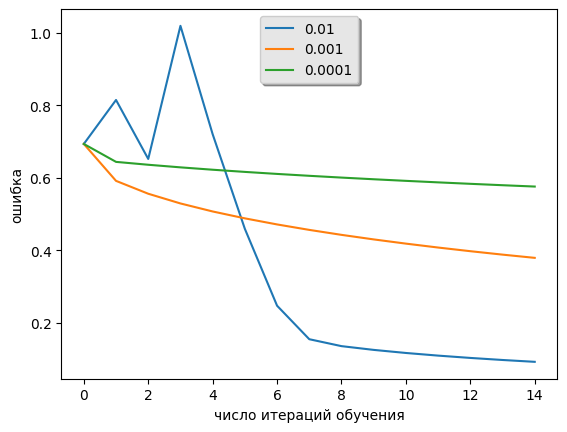

In [61]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('ошибка')
plt.xlabel('число итераций обучения')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Напишите выводы о результатах обучения с различными значениями скорости обучения

На малых скоростях обучения (0.001, 0.0001) получается, что обучение происходит плавно, но медленно <br>
На скорости (0.01) модель сходится быстрее, но в начале заметно, что веса немного "перескочили" локальный минимум и функция потерь увеличилась

## 7 - Тестирование произвольных изображений ##

Вы можете использовать произвольные изображения для того, чтобы оценить полученную нейронную сеть. Для этого:
1. Загрузите изображение в директрию images данного Jupyter Notebook
2. Измените переменную my_name на имя загруженного изображения
3. Запустите ячейку кода и оцените результат (1 = cat, 0 = non-cat)!

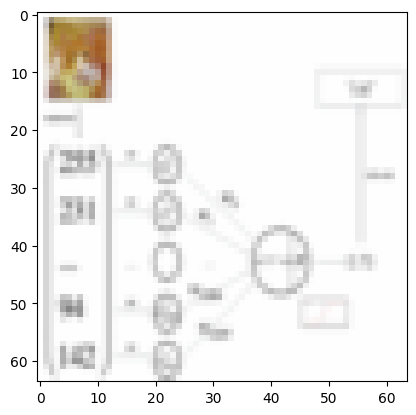

y = 1.0, предсказание нейросети: "cat" на изображении.


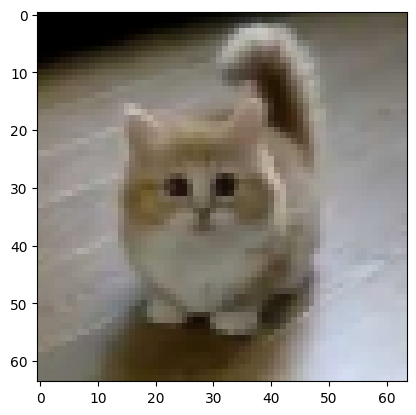

y = 1.0, предсказание нейросети: "cat" на изображении.


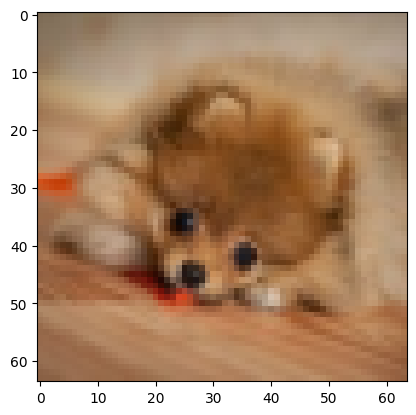

y = 0.0, предсказание нейросети: "non-cat" на изображении.


In [65]:
from skimage import transform
from skimage.io import imread

"""my_image = Укажите имя вашего изображения в папке images"""
image_names= ['log_reg.png', 'my_image_cat.jpg', 'my_image_dog.jpg']
for i in range(3):
    # Загрузка указанного изображения
    fname = "images/" + image_names[i]
    image = np.array(imread(fname))

    # Предобработка и изменение размера изображения
    image = image/255.
    image = transform.resize(image, [num_py,num_px,3])
    my_image = image.reshape((1, num_py*num_px*3)).T

    my_predicted_image = predict(d["w"], d["b"], my_image)
    
    plt.imshow(image)
    plt.show()
    print("y = " + str(np.squeeze(my_predicted_image)) + ", предсказание нейросети: \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" на изображении.")

Контрольные вопросы:
1. Что такое логистическая регрессия?
2. Что такое нейронная сеть?

Логистическая регрессия - модель линейной классификации (здесь скорее проводится регрессия уровня уверенности в принадлежности объекта классу) <br>
Сигмоида как финальная операция позволяет получить предсказание вероятности

Нейронная сеть - система (граф) искусственных нейронов (весов и сумматоров), а так же нелинейных функций активации, <br>
позволяющих выделить комплексные функциональные зависимости